In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

print(tf.__version__)

2.0.0


In [2]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
total_dir = os.path.join("D:/", "# Studie/# MSc Data Science/Applied Machine Learning/Kaggle_Project")
test_dir = os.path.join("D:/", "# Studie/# MSc Data Science/Applied Machine Learning/Kaggle_Project", "test_set")
train_dir = os.path.join("D:/", "# Studie/# MSc Data Science/Applied Machine Learning/Kaggle_Project", "train_set")

In [33]:
from tensorflow.keras.optimizers import SGD
# parameters of the model
batch_size = 32
epochs = 20
IMG_HEIGHT = 200
IMG_WIDTH = 200
INIT_LR = 0.01
opt = SGD(lr=INIT_LR, decay=INIT_LR / epochs)

In [34]:
train_image_generator = ImageDataGenerator(#featurewise_center=True
                                           rescale=1./255, 
                                           zoom_range=0.1,
                                           rotation_range=30,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True,
                                           shear_range=0.1,
                                           fill_mode='nearest',
                                           validation_split=0.2) # Generator for our training data

In [35]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical',
                                                           subset='training')

Found 24523 images belonging to 80 classes.


In [36]:
val_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical',
                                                           subset='validation')

Found 6089 images belonging to 80 classes.


In [37]:
sample_training_images, labels = next(train_data_gen)

In [38]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

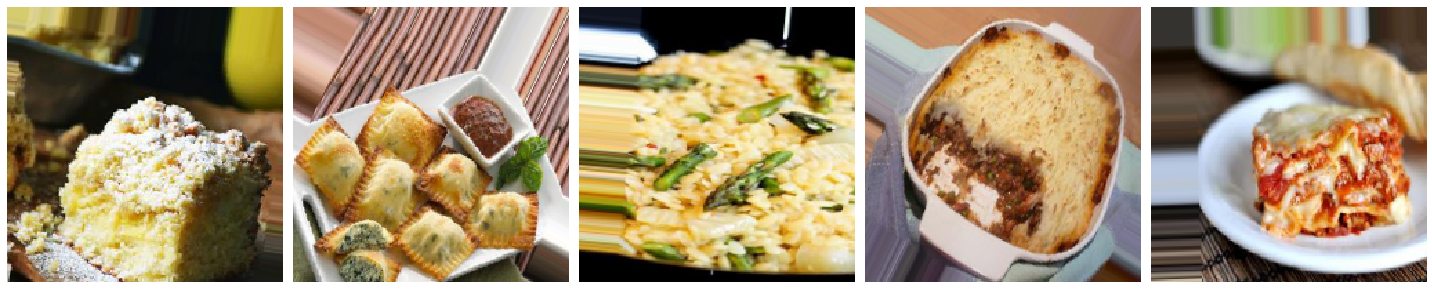

In [39]:
plotImages(sample_training_images[:5])

(200, 200, 3)
Given prediction 71
Actual key 74


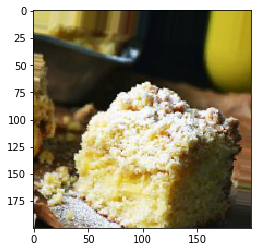

(200, 200, 3)
Given prediction 64
Actual key 68


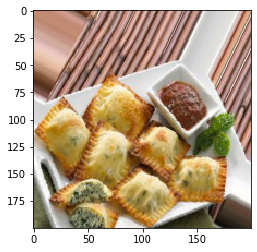

(200, 200, 3)
Given prediction 45
Actual key 50


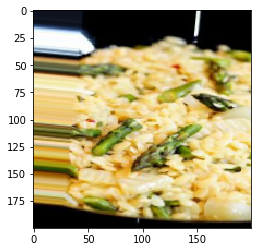

In [40]:
from numpy import asarray
class_label_dict = train_data_gen.class_indices

for i in range(0,3):
    image = sample_training_images[i]
    label = labels[i]
    plt.imshow(image)
    data = asarray(image)
    print(data.shape)
    prediction = np.argmax(label)
    print("Given prediction", prediction)
    for key, value in class_label_dict.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if value == prediction:
            print("Actual key", key)
    plt.show()

In [49]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),

    Flatten(),
    
    Dense(512, activation='relu'),
        
    Dense(80, activation='softmax')
])

In [50]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 25, 25, 128)      

In [58]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= val_data_gen.samples // batch_size,
    callbacks=[ReduceLROnPlateau(factor=.5, patience=4, verbose=1)]
)

Epoch 1/20
766/766 [==============================] - 408s 533ms/step - loss: 2.6430 - accuracy: 0.3182 - val_loss: 3.0250 - val_accuracy: 0.2579
Epoch 2/20
766/766 [==============================] - 404s 527ms/step - loss: 2.6191 - accuracy: 0.3246 - val_loss: 3.0062 - val_accuracy: 0.2648
Epoch 3/20
766/766 [==============================] - 396s 517ms/step - loss: 2.5983 - accuracy: 0.3290 - val_loss: 3.0002 - val_accuracy: 0.2725
Epoch 4/20
766/766 [==============================] - 399s 521ms/step - loss: 2.5699 - accuracy: 0.3337 - val_loss: 3.0013 - val_accuracy: 0.2696
Epoch 5/20
766/766 [==============================] - 397s 518ms/step - loss: 2.5456 - accuracy: 0.3393 - val_loss: 3.0217 - val_accuracy: 0.2722
Epoch 6/20
766/766 [==============================] - 393s 513ms/step - loss: 2.5240 - accuracy: 0.3472 - val_loss: 3.0440 - val_accuracy: 0.2618
Epoch 7/20
765/766 [============================>.] - ETA: 0s - loss: 2.4928 - accuracy: 0.3514
Epoch 00007: ReduceLROnPlate

32/1 - 0s - loss: 1.4190 - accuracy: 0.5625


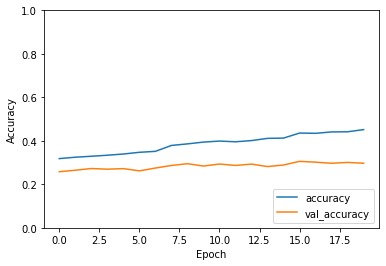

In [59]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(sample_training_images, labels, verbose=2)

In [60]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="categorical")

Found 7653 images belonging to 1 classes.


In [61]:
test_generator.reset()
pred=model.predict_generator(test_generator)
predictions= np.argmax(pred, axis=1)
filenames = test_generator.filenames
filenames1 = [i[9:] for i in filenames]

In [62]:
import pandas as pd
submission_df = pd.DataFrame( {'img_name': filenames1,'prediction': predictions, 'label': " "})

for index, row in submission_df.iterrows():
    prediction = row['prediction']
    for key, value in class_label_dict.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if prediction == value:
            submission_df.at[index, 'label'] = key

submission_df = submission_df.drop(columns="prediction")
submission_df.to_csv('submission.csv', index=False)

In [63]:
model.save('good_model1.h5')